<span style="color:red">Contexto:  </span>  

En este proyecto sólo de mostrarán los métodos que conozco, estos métodos son utilizados para filtrar outliers, escalar datos, aplicar modelos de ML, etc. La idea es sólo mostrar los conocimientos y sé que algunos de estos sólo deben ser utilizados en determinadas circuntacias.
Estas circuntacias serán asumidas, pero yo sé que se deben revisar estas, por ejemplo queremos utilizar un filtrado de outliers a través de z-score, entonces debemos verificar que los datos tengan distribución. Esto se puede realizar utilizando una gráfica Q-Q, un test de hipotesis como el test de Shapiro.


Fuentes de información:  
https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset  
https://www.kaggle.com/code/xkshitijx/using-randomforest-naivebayes/notebook  


ML Life cycle  
https://www.youtube.com/watch?v=xhB-dmKmzRk&ab_channel=KrishNaik  
https://github.com/krishnaik06/Advanced-House-Price-Prediction-/blob/master/Exploratory%20Data%20Analysis%20Part%201.ipynb  
https://neptune.ai/blog/life-cycle-of-a-machine-learning-project  
https://www.datacamp.com/blog/machine-learning-lifecycle-explained  
https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/well-architected-machine-learning-lifecycle.html  

In [1]:
# Fase de análisis de los datos
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats   
import pickle
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import gdown

#if False:
if True:    
    # Outlier
    from sklearn.covariance import MinCovDet
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.linear_model import HuberRegressor, Ridge
    from sklearn.preprocessing import RobustScaler
    from sklearn.ensemble import IsolationForest
    from scipy.stats.mstats import winsorize


#if False:
if True:    
    # Fase de modelamiento de datos usando algoritmos de ML
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import OneHotEncoder    

# escalamiento:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler # estandarizacion normal 

# Modelos de ML
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.neighbors import NearestCentroid
import xgboost as xgb

#Medidas de modelos ML
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Directorio 
!mkdir "Datos"
!mkdir "Resultados"
!mkdir "modelos"

Ya existe el subdirectorio o el archivo Datos.
Ya existe el subdirectorio o el archivo Resultados.
Ya existe el subdirectorio o el archivo modelos.


<span style="color:purple">Opción para descargar los modelos entrenados y sus resultados inmediatamente.</span>    

In [ ]:
#if False:
if True:    
    def descomprimir(filename, destino):
        # Cargar archivo RAR
        with az.rar.RarArchive(filename) as archive:
            archive.extract_to_directory(destino)  

    # Datos
    drive_url = 'https://drive.google.com/drive/folders/1MkZlkvwg1YGYW-EI5CirL6lsRj3AN3Jy?usp=drive_link'
    output_name = "./Datos/Data_celulares.csv"
    gdown.download(drive_url, output_name, quiet=False)
    
    # Modelos notar que el archivo comprimido pesa 100Mb y descomprimido pesa aprox 600 Mb
    drive_url = 'https://drive.google.com/file/d/1IcxS17Lh_01LS2LAL1-BwbHOmhBb59Vl/view?usp=drive_link'
    output_name = ".modelosv2.rar"
    gdown.download(url=drive_url, output=output_name, fuzzy=True, quiet=False)
    
    # descomprimir el contenido de modelos.zip
    fantasy_zip = zipfile.ZipFile('./modelos.zip')
    fantasy_zip.extractall('./modelos/')
    fantasy_zip.close()

In [3]:
output_name = "./Datos/Data_celulares.csv"
data = pd.read_csv(output_name)
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


### Descripción de variable dependiente "price_range":
<span style="color:purple">La variable dependiente "price_range" tiene valores 0,1,2 y 3. Cada uno de estos valores representa un intervalo de precios, en donde el valor 0 representa al intervalo de menor precio y el valor 3 representa el intervalo de mayor precio..</span>    

### Cambio de valores de la variable dependiente "price_range":

In [4]:
orden_leyenda = ['Precio muy bajo','Precio bajo','Precio medio','Precio alto']
dict_orden={u:v for u,v in zip(list(range(0,4)),orden_leyenda)}

data["price_range_sort"]=data["price_range"]
data["price_range"]=data["price_range"].map(dict_orden)

# Ordenar el DataFrame según el orden deseado
data = data.sort_values(by='price_range_sort', ascending=True)
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_sort
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,Precio muy bajo,0
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,Precio muy bajo,0


Los seis pasos para entender el ciclo de vida de un proyecto de machine learning:
- Data analysis
- feacture engineering
- Feacture selection
- Model building 
- Model Deployment
- Monitoring and Maintenance

# Data analysis.

El objetivo del análisis de datos es encontrar lo siguiente:
- Missing Values
- Distribución de las variables númericas
- Cardinilidad de las variables discretas
- Outliers
- Relaciones entre variables independientes v/s variables dependientes

## Missing Values

In [5]:
print(data.isna().sum())

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range         0
price_range_sort    0
dtype: int64


## Distribución de los datos

### Tipo de datos de las Variables

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1838 to 1999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     2000 non-null   int64  
 1   blue              2000 non-null   int64  
 2   clock_speed       2000 non-null   float64
 3   dual_sim          2000 non-null   int64  
 4   fc                2000 non-null   int64  
 5   four_g            2000 non-null   int64  
 6   int_memory        2000 non-null   int64  
 7   m_dep             2000 non-null   float64
 8   mobile_wt         2000 non-null   int64  
 9   n_cores           2000 non-null   int64  
 10  pc                2000 non-null   int64  
 11  px_height         2000 non-null   int64  
 12  px_width          2000 non-null   int64  
 13  ram               2000 non-null   int64  
 14  sc_h              2000 non-null   int64  
 15  sc_w              2000 non-null   int64  
 16  talk_time         2000 non-null   int64  
 1

In [7]:
lista=["blue","dual_sim","four_g","three_g","touch_screen","wifi","price_range","price_range_sort"]

for columna in lista:
    data[columna] = data[columna].astype('category')    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1838 to 1999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   battery_power     2000 non-null   int64   
 1   blue              2000 non-null   category
 2   clock_speed       2000 non-null   float64 
 3   dual_sim          2000 non-null   category
 4   fc                2000 non-null   int64   
 5   four_g            2000 non-null   category
 6   int_memory        2000 non-null   int64   
 7   m_dep             2000 non-null   float64 
 8   mobile_wt         2000 non-null   int64   
 9   n_cores           2000 non-null   int64   
 10  pc                2000 non-null   int64   
 11  px_height         2000 non-null   int64   
 12  px_width          2000 non-null   int64   
 13  ram               2000 non-null   int64   
 14  sc_h              2000 non-null   int64   
 15  sc_w              2000 non-null   int64   
 16  talk_time         2000 non

In [8]:
columnas=list(data.columns)
for col in columnas:
    print(col,"--->",
        data[col].dtypes  ,"--->",
        len(data[col].unique()))

battery_power ---> int64 ---> 1094
blue ---> category ---> 2
clock_speed ---> float64 ---> 26
dual_sim ---> category ---> 2
fc ---> int64 ---> 20
four_g ---> category ---> 2
int_memory ---> int64 ---> 63
m_dep ---> float64 ---> 10
mobile_wt ---> int64 ---> 121
n_cores ---> int64 ---> 8
pc ---> int64 ---> 21
px_height ---> int64 ---> 1137
px_width ---> int64 ---> 1109
ram ---> int64 ---> 1562
sc_h ---> int64 ---> 15
sc_w ---> int64 ---> 19
talk_time ---> int64 ---> 19
three_g ---> category ---> 2
touch_screen ---> category ---> 2
wifi ---> category ---> 2
price_range ---> category ---> 4
price_range_sort ---> category ---> 4


### Distribución de los datos númericos

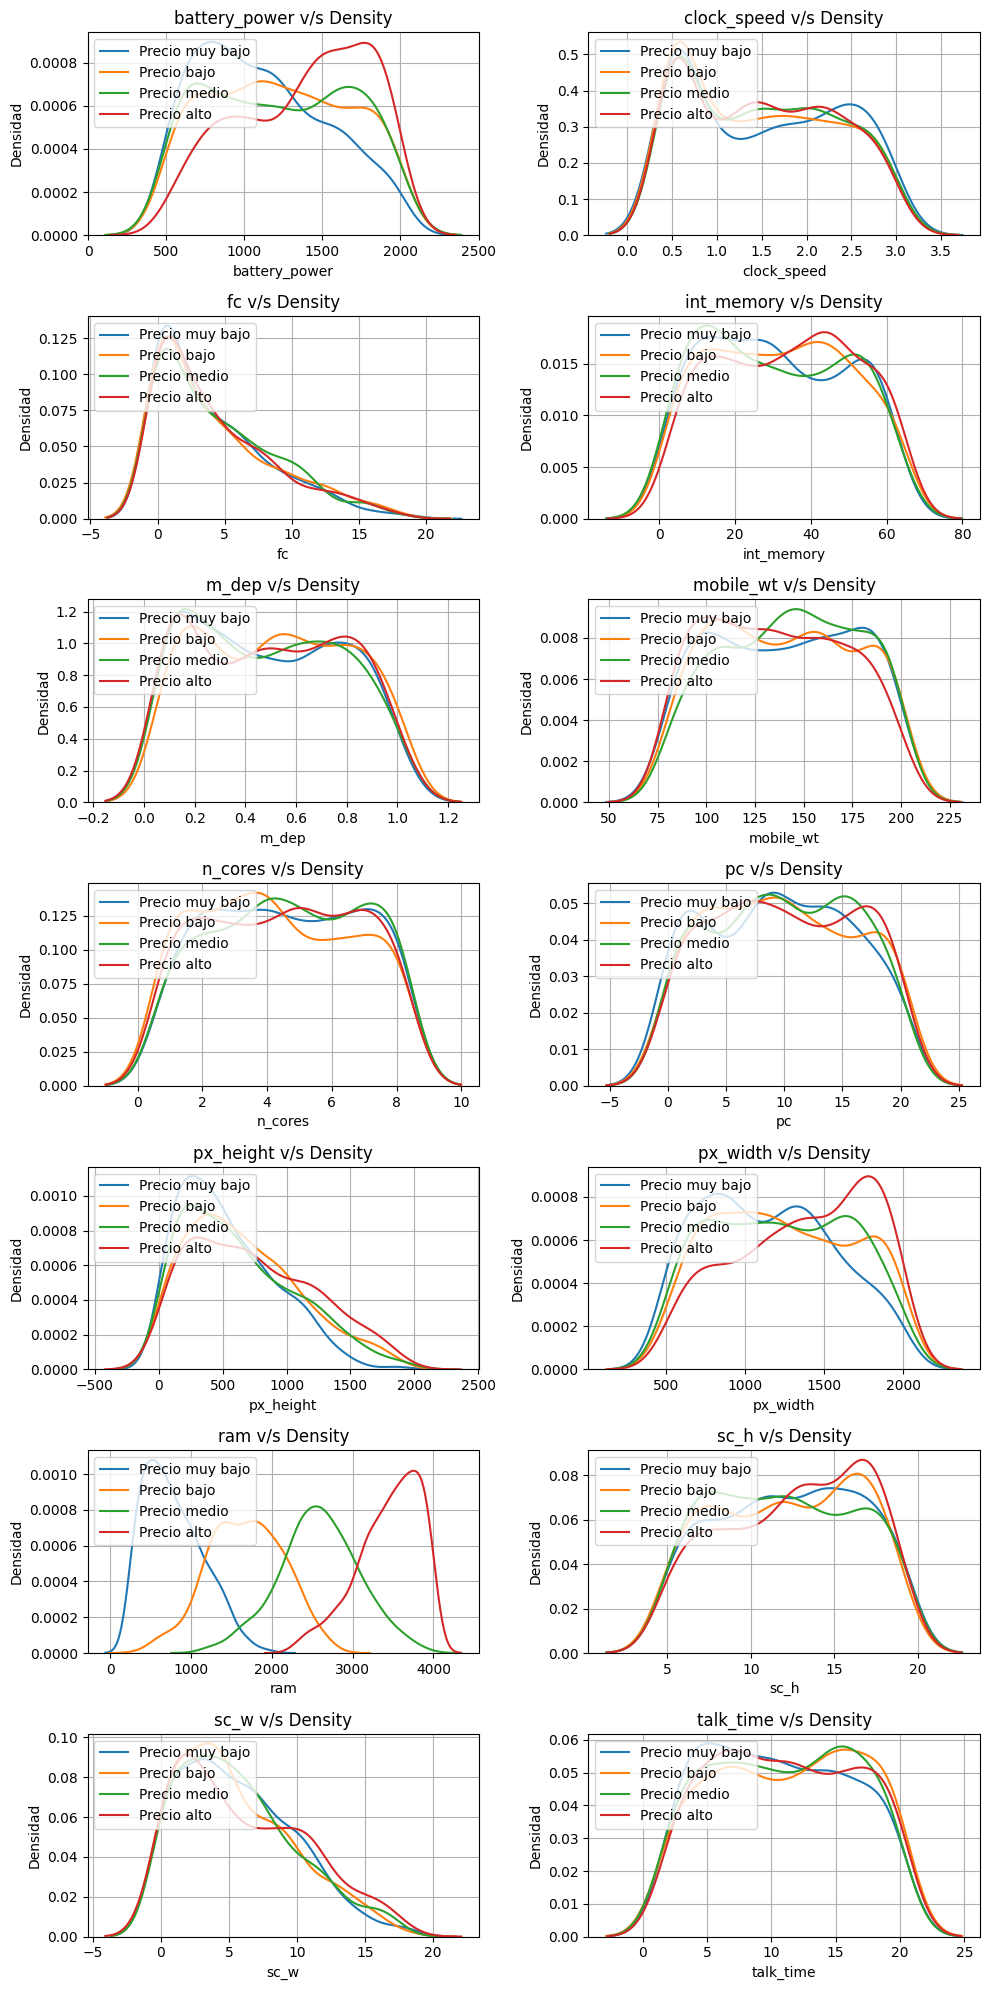

In [9]:
#if False:
if True:    
    columnas_numericas=data.select_dtypes(exclude=["category"]).columns
    columnas_category=data.select_dtypes(include=["category"]).columns
    label_prices=data["price_range"].unique()


    cant_rows=len(columnas_numericas) //2
    residuo=len(columnas_numericas) % 2
    if residuo == 1:
        cant_rows=cant_rows + 1 

    fig, axes = plt.subplots(nrows=cant_rows, ncols=2, figsize=(10, 20))

    for j in range(len(columnas_numericas)):
        feature=columnas_numericas[j]
        if "price_range"==feature:
            break
        num_row=j // 2
        num_col=j % 2
        
        for etiq in label_prices:
            sns.kdeplot(x=feature, data=data[data["price_range"]==etiq], ax=axes[num_row, num_col], label=etiq)    
        axes[num_row, num_col].grid()
        axes[num_row, num_col].set_title(feature+' v/s Density' )
        axes[num_row, num_col].set_xlabel(feature)
        axes[num_row, num_col].set_ylabel('Densidad')
        axes[num_row, num_col].legend(orden_leyenda,loc='upper left') 
        #plt.legend(orden_leyenda, loc='best')  # Aquí se usa el orden deseado en la leyenda
    plt.tight_layout()
    plt.show()

### Distribución de datos de variables numéricas en los datos

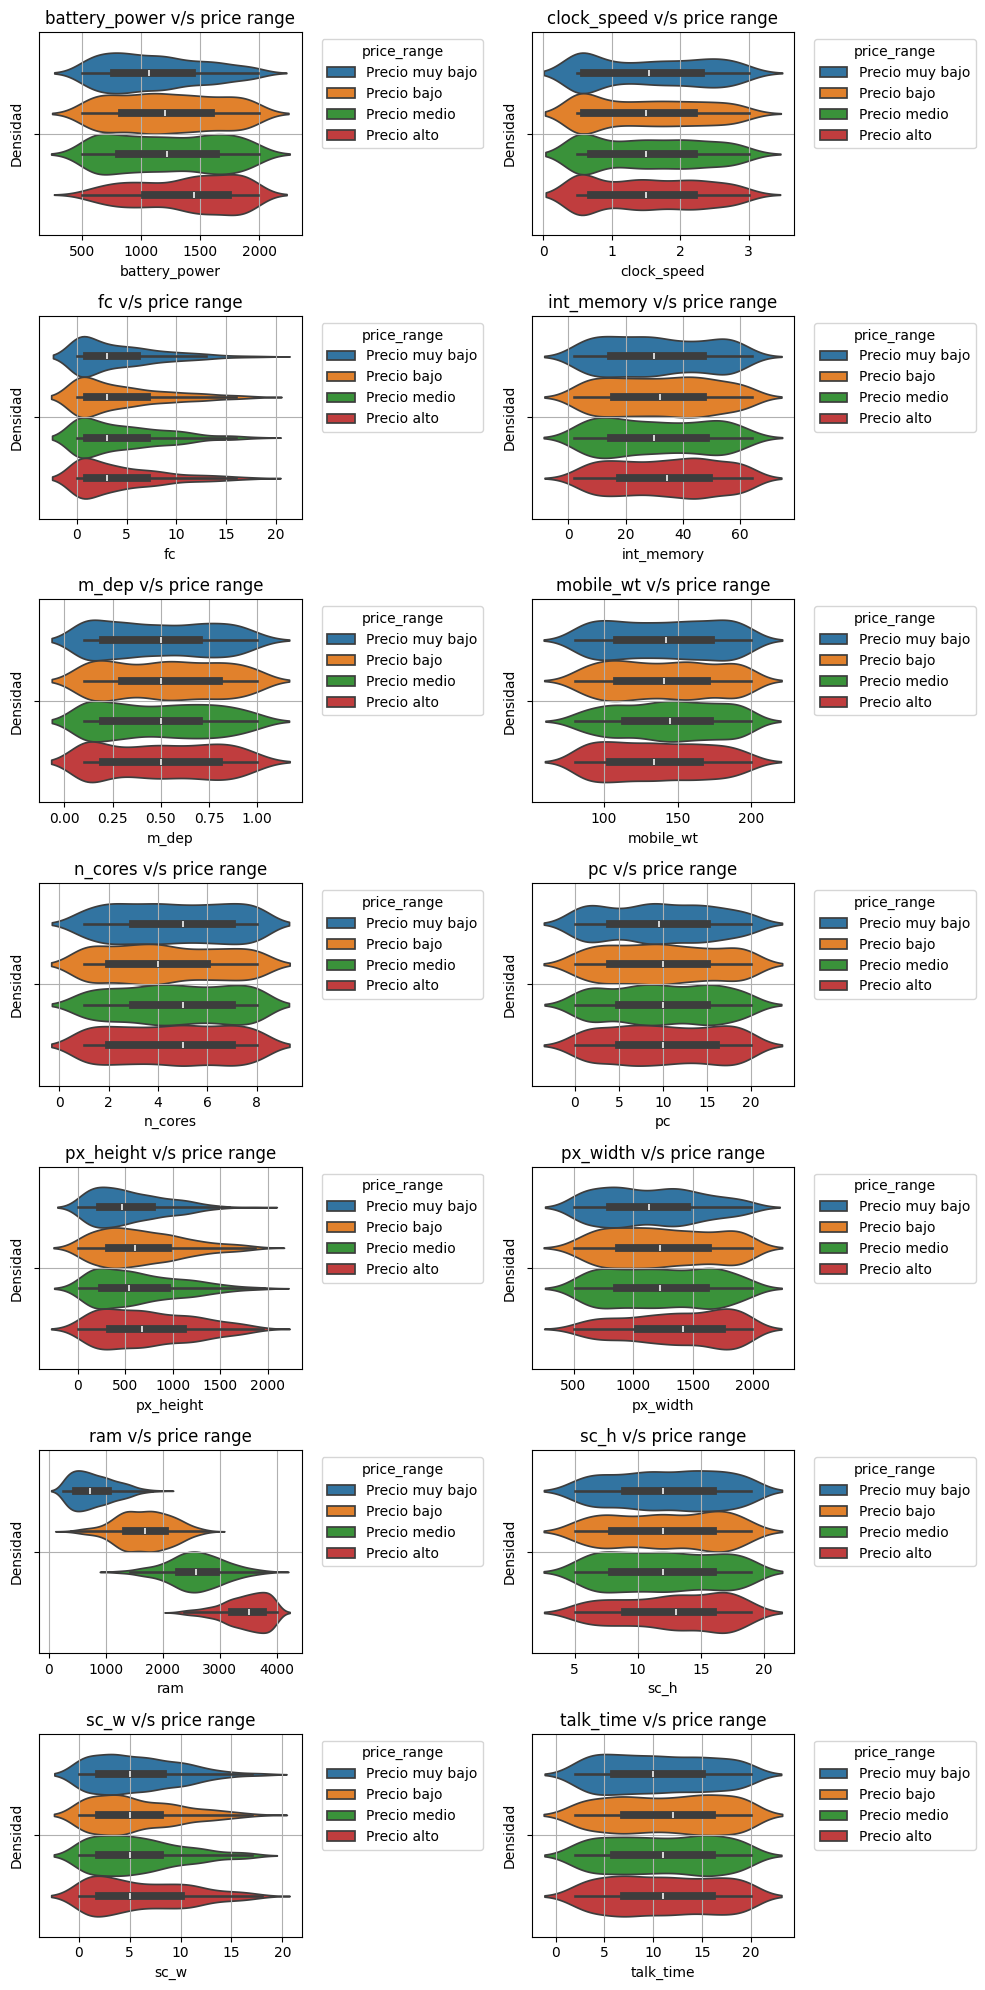

In [10]:
#if False:
if True:        
    columnas_numericas=data.select_dtypes(exclude=["category"]).columns
    columnas_category=data.select_dtypes(include=["category"]).columns

    label_prices=data["price_range"].unique()


    cant_rows=len(columnas_numericas) //2
    residuo=len(columnas_numericas) % 2
    if residuo == 1:
        cant_rows=cant_rows + 1 

    fig, axes = plt.subplots(nrows=cant_rows, ncols=2, figsize=(10, 20))

    for j in range(len(columnas_numericas)):
        feature=columnas_numericas[j]
        num_row=j // 2
        num_col=j % 2
        
        sns.violinplot(x=feature, hue="price_range",data=data, ax=axes[num_row, num_col],hue_order=orden_leyenda)
        
        
        axes[num_row, num_col].grid()
        axes[num_row, num_col].set_title(feature+' v/s price range' )
        axes[num_row, num_col].set_xlabel(feature)
        axes[num_row, num_col].set_ylabel('Densidad')
        axes[num_row, num_col].legend(title="price_range", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
        


### Proporción de los valores de los datos caso discreto.

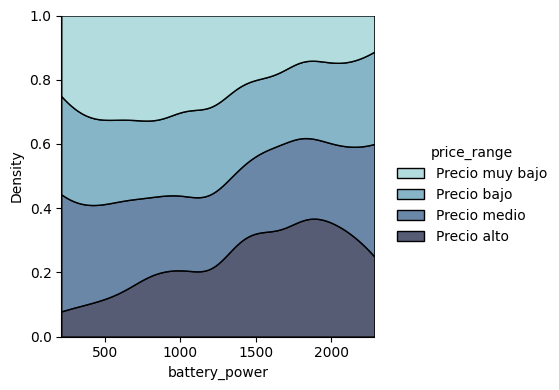

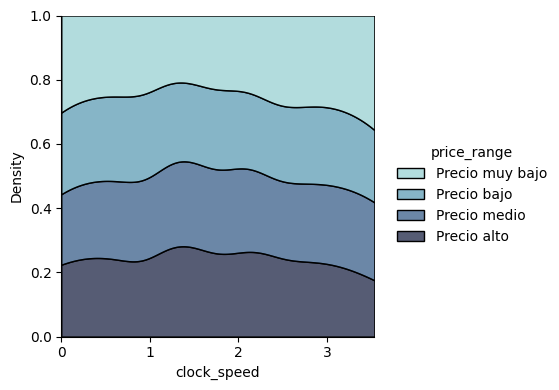

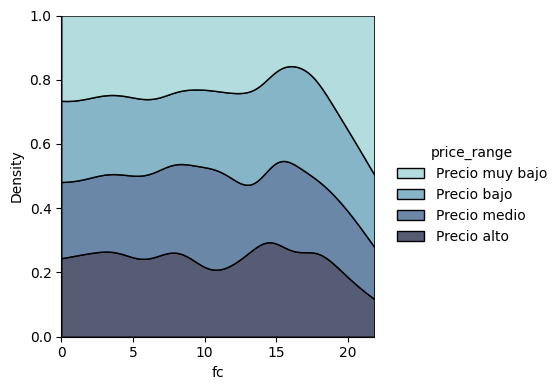

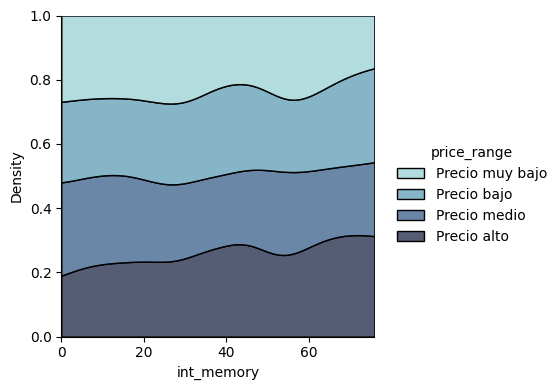

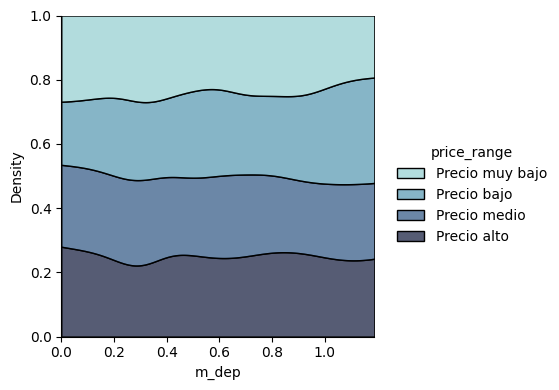

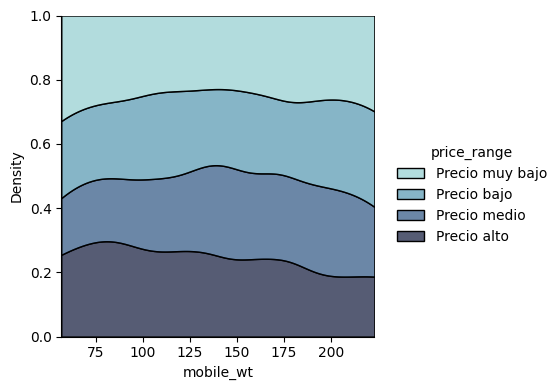

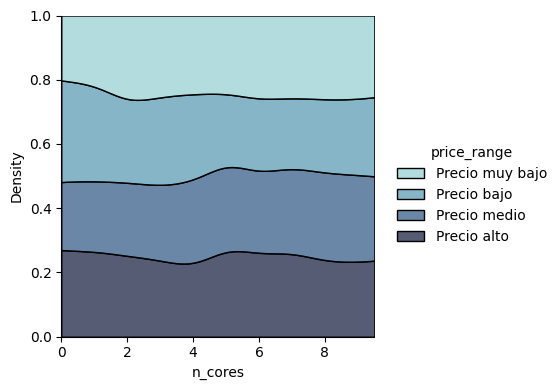

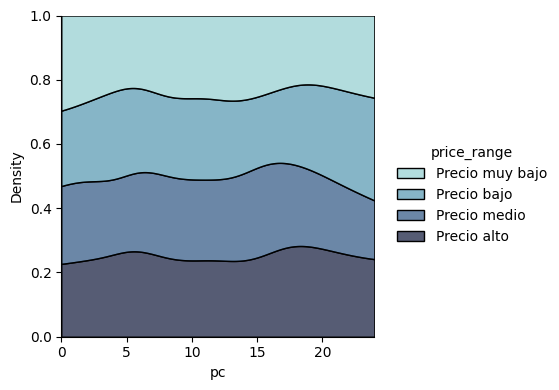

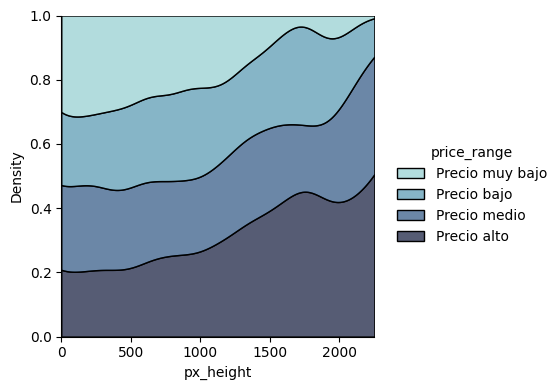

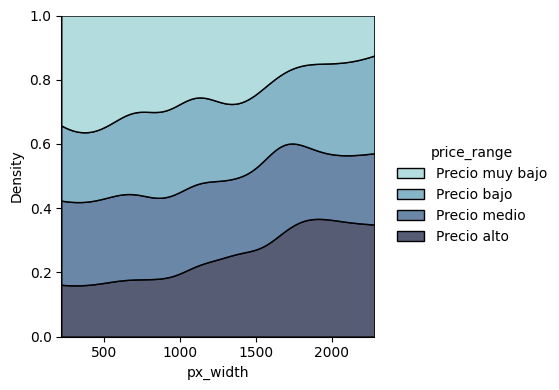

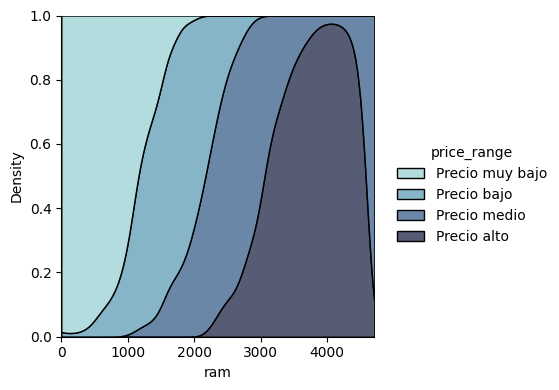

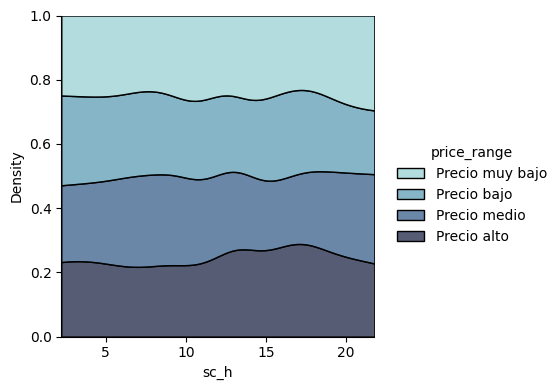

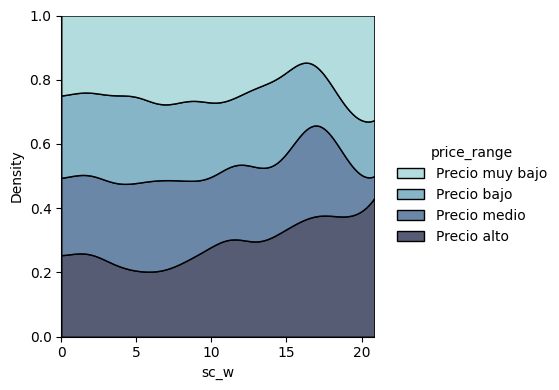

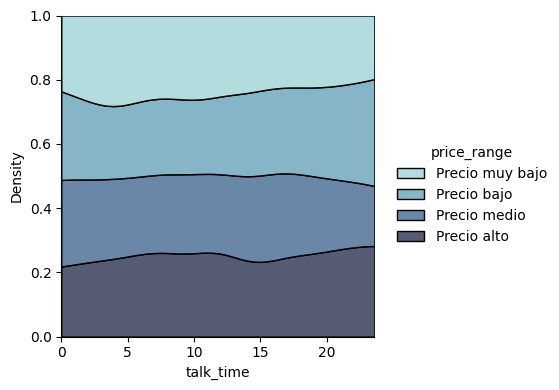

In [11]:
#if False:
if True:        
#    sns.set_theme(style="whitegrid")
    
    columnas_numericas=list(data.select_dtypes(exclude=["category"]).columns)
    columnas_category=list(data.select_dtypes(include=["category"]).columns)

    label_prices=data["price_range"].unique()

    l_col=columnas_numericas[0:]
    for col in l_col:
        #fig = plt.figure(figsize=(3, 2))
        sns.displot( data, x=col, hue="price_range",kind="kde", multiple="fill" ,height=4, clip=(0, None), palette="ch:rot=-.25,hue=1,light=.75",hue_order=orden_leyenda)
        plt.show()




In [13]:
value_counts_result = data.price_range.value_counts()
value_counts_result

price_range
Precio alto        500
Precio bajo        500
Precio medio       500
Precio muy bajo    500
Name: count, dtype: int64

## Detección de Outliers
### Detección de Outlier sin filtar valores de la variable dependiente

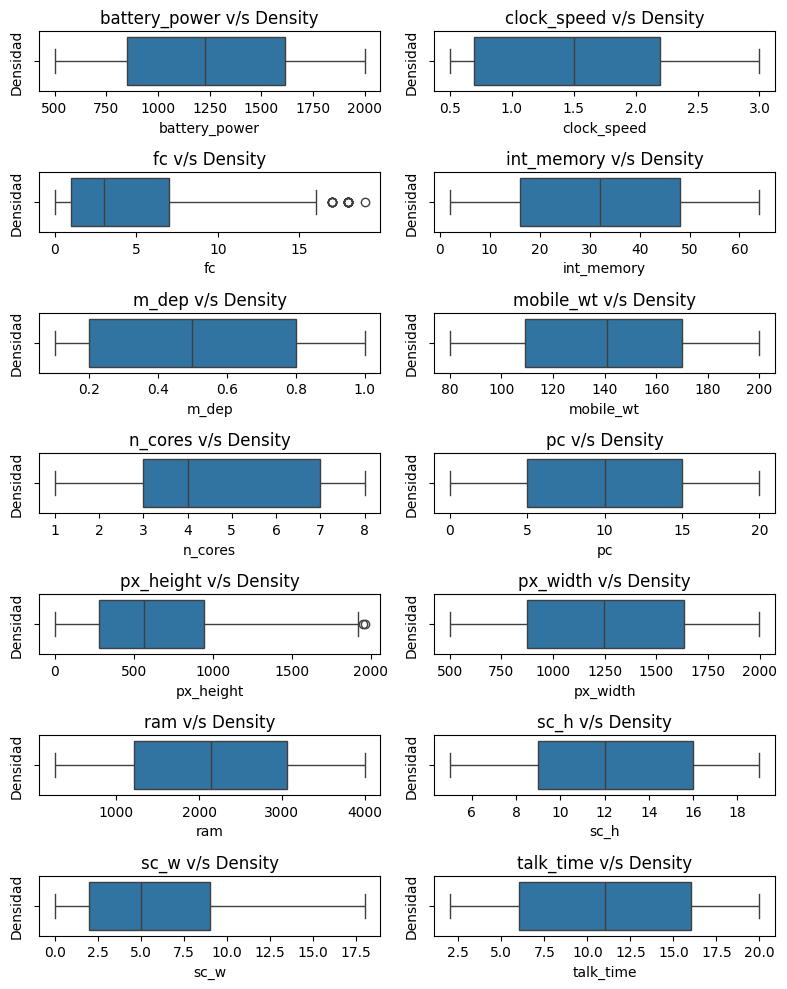

In [14]:
if True:
#if False:    
    columnas_numericas=data.select_dtypes(exclude=["category"]).columns
    columnas_category=data.select_dtypes(include=["category"]).columns

    label_prices=data["price_range"].unique()


    cant_rows=len(columnas_numericas) //2
    residuo=len(columnas_numericas) % 2
    if residuo == 1:
        cant_rows=cant_rows + 1 


    fig, axes = plt.subplots(nrows=cant_rows, ncols=2, figsize=(8, 10))

    for j in range(len(columnas_numericas)):
        feature=columnas_numericas[j]
        num_row=j // 2
        num_col=j % 2
        
        sns.boxplot(x=feature, data=data, ax=axes[num_row, num_col])
        axes[num_row, num_col].set_title(feature+' v/s Density' )
        axes[num_row, num_col].set_xlabel(feature)
        axes[num_row, num_col].set_ylabel('Densidad')
    
    plt.tight_layout()
    plt.show()

### Detección de Outlier filtando valores de la variable dependiente

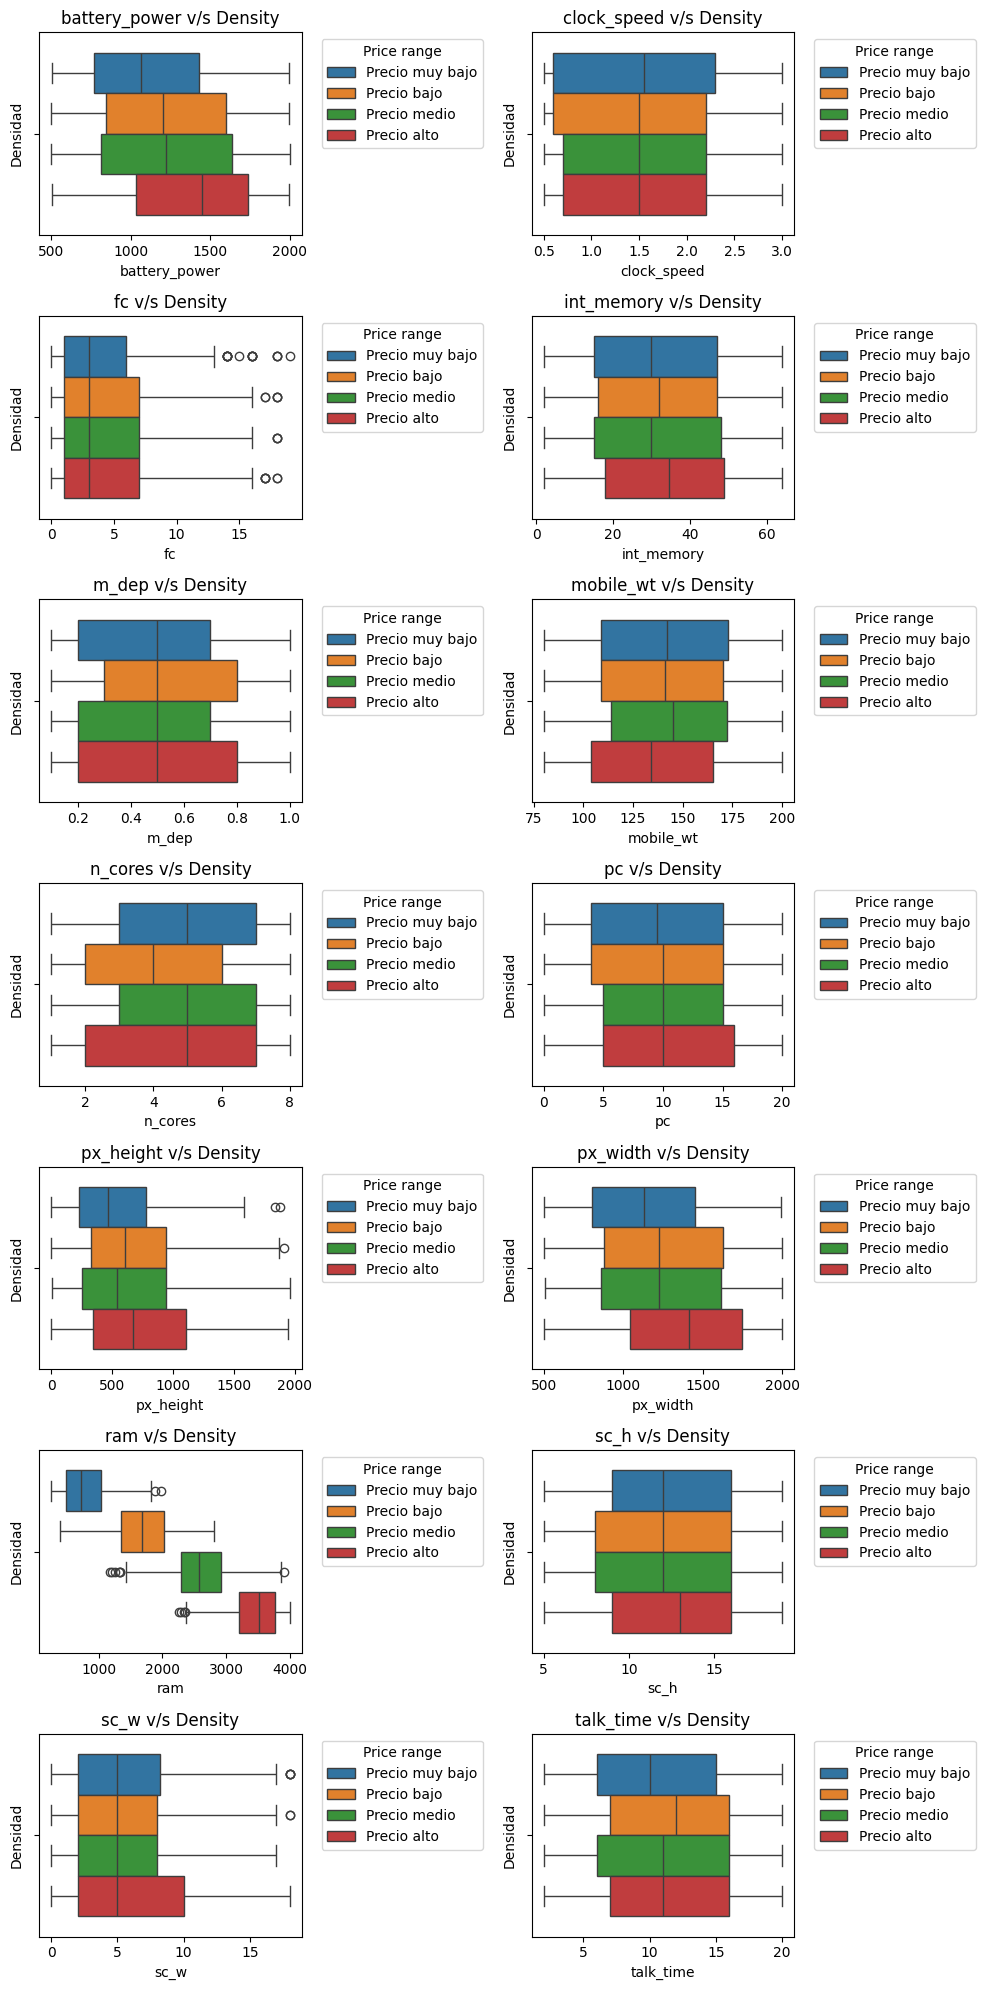

In [15]:
if True:
#if False:    
    columnas_numericas=data.select_dtypes(exclude=["category"]).columns
    columnas_category=data.select_dtypes(include=["category"]).columns

    label_prices=data["price_range"].unique()


    cant_rows=len(columnas_numericas) //2
    residuo=len(columnas_numericas) % 2
    if residuo == 1:
        cant_rows=cant_rows + 1 


    fig, axes = plt.subplots(nrows=cant_rows, ncols=2, figsize=(10, 20))

    for j in range(len(columnas_numericas)):
        feature=columnas_numericas[j]
        num_row=j // 2
        num_col=j % 2
        
        sns.boxplot(x=feature, data=data,hue="price_range", ax=axes[num_row, num_col],hue_order=orden_leyenda)
        axes[num_row, num_col].set_title(feature+' v/s Density' )
        axes[num_row, num_col].set_xlabel(feature)
        axes[num_row, num_col].set_ylabel('Densidad')
        axes[num_row, num_col].legend(title="Price range", bbox_to_anchor=(1.05, 1), loc='upper left')
        #axes[num_row, num_col].legend(loc='upper left') 

    plt.tight_layout()
    plt.show()
        


Quitar outliers por: 
- Por cuartiles
- z-score
- trimming
- winsorizing
- minimum covariance determinant
- local outlier factor
- Huber and Ridge
- isolation forest (tree-based algorithm)



In [16]:
# Forma 1: Por cuartiles
def cuartiles(df, columna, factor=1.4):
    
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir el rango para identificar outliers
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    df_filtrado = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]
    return df_filtrado.reset_index(drop=True)


# Forma 2: Por z-score.
def filtrar_outliers_zscore_dataframe(dataframe, columna, umbral=3):
    z_scores = np.abs(stats.zscore(dataframe[columna]))
    dataframe_filtrado = dataframe[(z_scores < umbral)]
    return dataframe_filtrado.reset_index(drop=True)

# Forma 3: Por trimming.
def filtrar_outliers_trimming(dataframe, columna,alpha=0.05):
    p_inf, p_sup =alpha/2, 1- alpha/2
    # Calcular los percentiles
    percentil_inf = dataframe[columna].quantile(p_inf)
    percentil_sup = dataframe[columna].quantile(p_sup)
    
    # Filtrar los datos dentro del rango de percentiles
    dataframe_filtrado = dataframe[(dataframe[columna] >= percentil_inf) & (dataframe[columna] <= percentil_sup)]
    return dataframe_filtrado.reset_index(drop=True)


# Forma 4: Por winsorizing
def filtrar_outliers_winsorizing(dataframe, columna,alpha=0.1):
    p_inf, p_sup =alpha/2, 1- alpha/2
    # Aplicar winsorizing a la columna
    columna_winsorizada = winsorize(dataframe[columna], limits=(p_inf, p_sup))
    
    # Reemplazar la columna original con la columna winsorizada
    dataframe[columna] = columna_winsorizada
    
    return dataframe.reset_index(drop=True)

# Forma 5: Por minimum covariance determinant
def filtrar_outliers_mcd(dataframe, columna, contamination=0.1):
    # Ajustar el modelo MCD a la columna especificada
    mcd = MinCovDet(random_state=0)
    mcd.fit(dataframe[[columna]])
    
    # Calcular la distancia de Mahalanobis para identificar outliers
    mahalanobis_distance = mcd.mahalanobis(dataframe[[columna]])
    
    # Filtrar el DataFrame manteniendo solo las filas que no son outliers
    dataframe_filtrado = dataframe[mahalanobis_distance <= mcd.location_outlier_threshold_]
    
    return dataframe_filtrado.reset_index(drop=True)

# Forma 6: Por local outlier factor
def filtrar_outliers_lof(dataframe, columna, contaminacion=0.1):
    # Ajustar el modelo LOF a la columna especificada
    lof = LocalOutlierFactor(contamination=contaminacion)
    outliers = lof.fit_predict(dataframe[[columna]])
    
    # Filtrar el DataFrame manteniendo solo las filas que no son outliers
    dataframe_filtrado = dataframe[outliers != -1]
    
    return dataframe_filtrado.reset_index(drop=True)


# Forma 7: Por Huber and Ridge
def filtrar_outliers_huber(df, var_indep,target,umbral=3):
    # Establecer un umbral para identificar outliers (puedes ajustar este valor según tus necesidades)
    # umbral = 3  # Por ejemplo, utilizando 3 desviaciones estándar
    X = df[[var_indep]]
    y = df[target]

    # Escalar los datos utilizando RobustScaler para hacerlos robustos a los outliers
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    # Crear modelos de regresión Huber y Ridge
    huber_reg = HuberRegressor()
    huber_reg.fit(X_scaled, y)
    y_pred_huber = huber_reg.predict(X_scaled)
    
    # Calcular los residuos para identificar outliers
    residuos_huber = abs(y - y_pred_huber)
    
    # Filtrar outliers utilizando los residuos y el umbral
    df_filtrado_huber = df[residuos_huber < umbral]
    return df_filtrado_huber.reset_index(drop=True)

def filtrar_outliers_ridge(df, var_indep,target,umbral=3):
    # Establecer un umbral para identificar outliers (puedes ajustar este valor según tus necesidades)
    # umbral = 3  # Por ejemplo, utilizando 3 desviaciones estándar
    # Separar las características y la variable objetivo
    X = df[[var_indep]]
    y = df[target]
    # Escalar los datos utilizando RobustScaler para hacerlos robustos a los outliers
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    # Crear modelos de regresión Ridge
    ridge_reg = Ridge(alpha=1.0)
    ridge_reg.fit(X_scaled, y)
    y_pred_ridge = ridge_reg.predict(X_scaled)
    residuos_ridge = abs(y - y_pred_ridge) # Calcular los residuos para identificar outliers

    df_filtrado_ridge = df[residuos_ridge < umbral] # Filtrar outliers utilizando los residuos y el umbral
    return df_filtrado_ridge.reset_index(drop=True)

# Forma 8: Por isolation forest (tree-based algorithm)
def filtrar_outliers_lof(df, columna, contaminacion=0.1):
    X = df[columna]

    # Crear y ajustar el modelo Isolation Forest
    isoforest = IsolationForest(contamination=contaminacion, random_state=42)
    isoforest.fit(X)

    pred_anomalias = isoforest.predict(X)
    df['Outlier'] = pred_anomalias
    df_filtrado = df[df['Outlier'] == 1]  # -1 indica que es outlier, 1 indica que no es outlier
    df_filtrado = df_filtrado.drop(columns=['Outlier'])
    return df_filtrado.reset_index(drop=True)

l_function_name=["cuartiles","filtrar_outliers_zscore_dataframe","filtrar_outliers_trimming","filtrar_outliers_winsorizing","filtrar_outliers_mcd","filtrar_outliers_lof","filtrar_outliers_huber","filtrar_outliers_ridge","filtrar_outliers_lof"]
l_function=[cuartiles,filtrar_outliers_zscore_dataframe,filtrar_outliers_trimming,filtrar_outliers_winsorizing,filtrar_outliers_mcd,filtrar_outliers_lof,filtrar_outliers_huber,filtrar_outliers_ridge,filtrar_outliers_lof]
dict_function_outlier={u:v for u,v in zip(l_function_name,l_function)}


with open("data.pickle", "wb") as archivo:
    pickle.dump(data, archivo)

In [17]:
with open("data.pickle", "rb") as archivo:
    data = pickle.load(archivo)    

list_cols_outiliers=["fc","int_memory","ram","px_height"] # columnas con outliers
imagen_price_range=list(data["price_range"].value_counts().index)
factor=1.4 # factor que determina que tan estricto es para eliminar outliers (más alto más estricto)

dict_df={}
target="price_range_sort"


for name_met_outlier in list(dict_function_outlier.keys()):
    df1=data.copy()
    
    for col in list_cols_outiliers:
        for price in imagen_price_range:
            mascara=df1["price_range"]==price
            df2=df1[mascara].reset_index(drop=True)
            # inicio
            if "filtrar_outliers_mcd"==name_met_outlier or "filtrar_outliers_lof"==name_met_outlier or "filtrar_outliers_huber"==name_met_outlier:
                break
            f_met_outlier=dict_function_outlier[name_met_outlier]
            if "filtrar_outliers_huber"==name_met_outlier or "filtrar_outliers_ridge"==name_met_outlier:
                break
                data_sin_outliers = f_met_outlier(df2, col,target)
            else:
                data_sin_outliers = f_met_outlier(df2, col)
            dimension=data_sin_outliers.shape

            if dimension[0]!=0:
                df1=pd.concat([data_sin_outliers,df1[~mascara]]).reset_index(drop=True)
            else:
                df1=df1[~mascara].reset_index(drop=True)
        
            # fin
         
    # guardar dataframe filtrado:
    
    if df1.shape[0]< data.shape[0]:
        # dejar datos en su version normal
        nombres_nuevos = {"Precio muy bajo":0, "Precio bajo":1, "Precio medio":2, "Precio alto":3}
        df1['price_range'] = df1['price_range'].replace(nombres_nuevos)
        df1['price_range'] = df1['price_range'].astype('category')
        df1 = df1.drop(columns=['price_range_sort'])
        
        # Agregar al dataframe 
        dict_df[name_met_outlier]=df1
    

with open("dict_df_outlier.pickle", "wb") as archivo:
    pickle.dump(dict_df, archivo)

print("Tamaño del DataFrame original:", data.shape," \n ")
for name,dataframev in zip(dict_df.keys(),dict_df.values()):
    # Mostrar la forma del DataFrame original y el DataFrame sin outliers
    print("Tamaño del DataFrame de ",name,": ", dataframev.shape)     

Tamaño del DataFrame original: (2000, 22)  
 
Tamaño del DataFrame de  cuartiles :  (1920, 21)
Tamaño del DataFrame de  filtrar_outliers_zscore_dataframe :  (1983, 21)
Tamaño del DataFrame de  filtrar_outliers_trimming :  (1701, 21)


#### Revisión de quitar los outlier por método: filtrar_outliers_trimming
Filtrando en función de la variable dependiente

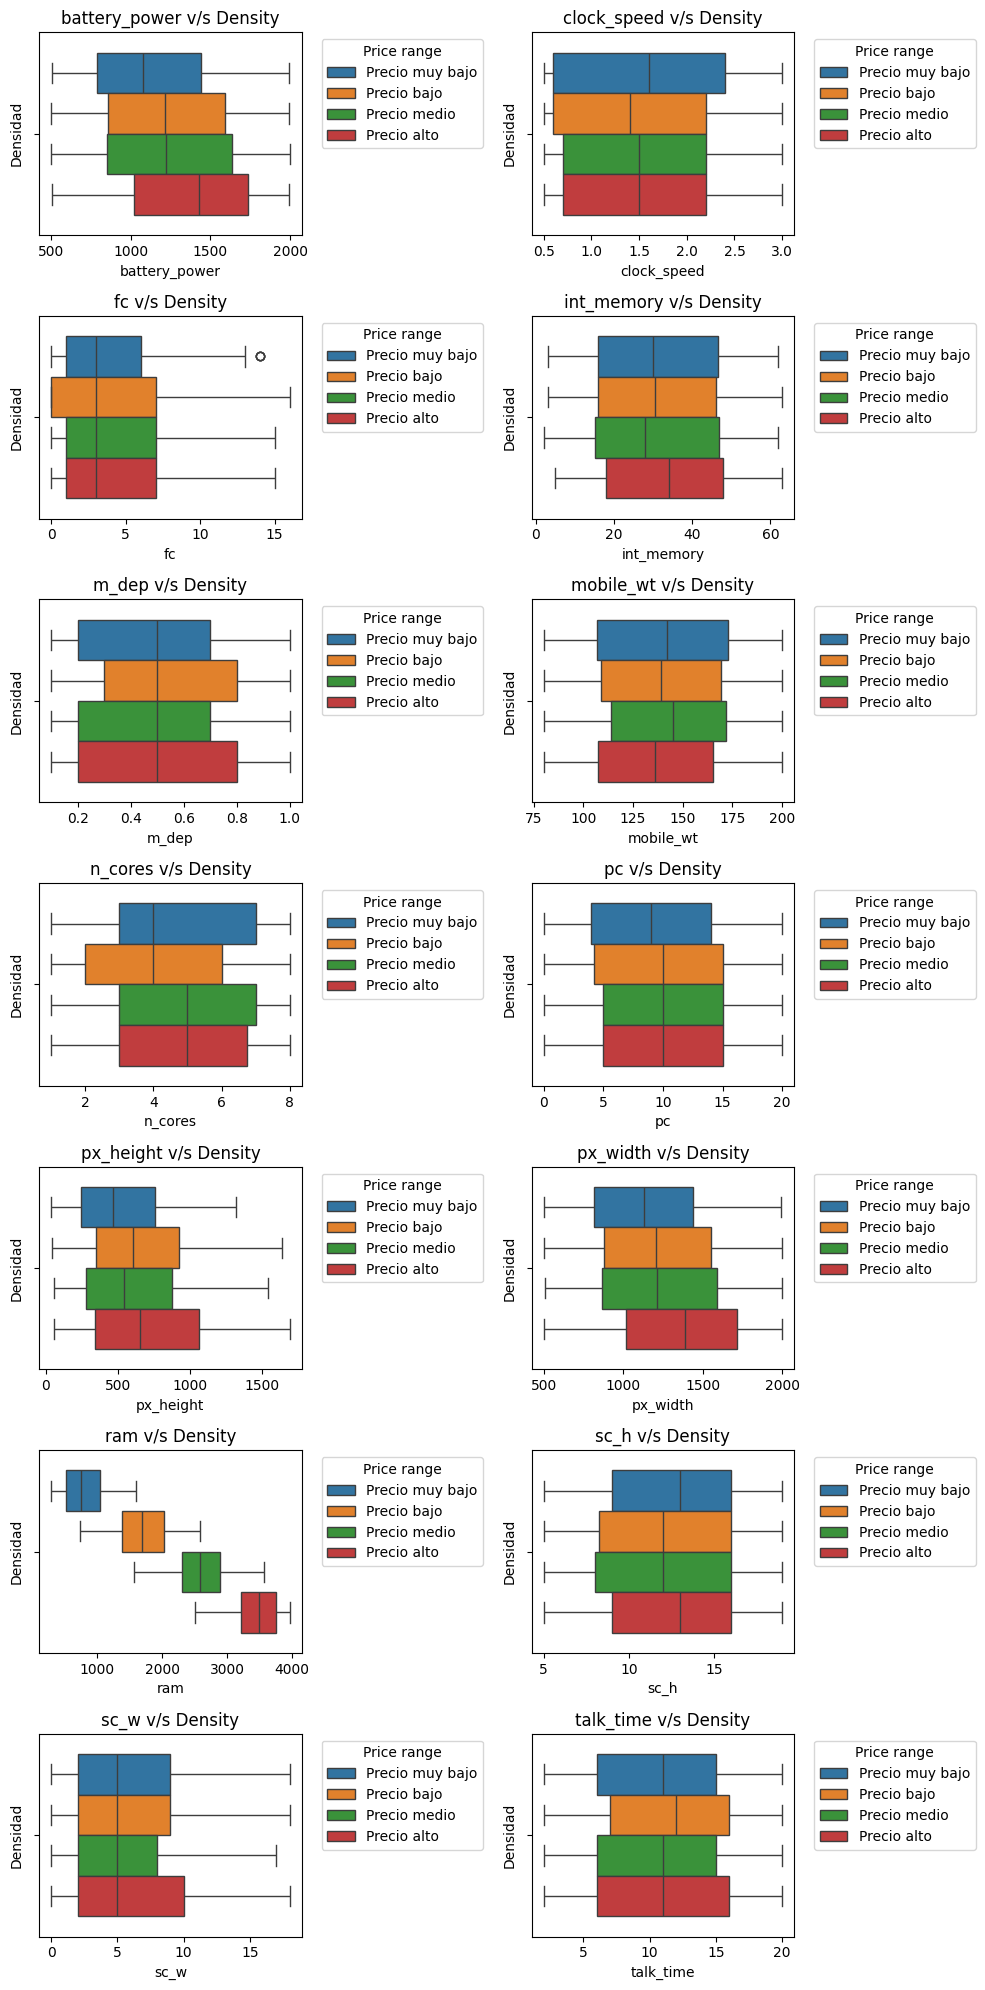

In [18]:
with open("dict_df_outlier.pickle", "rb") as archivo:
    dict_cargado = pickle.load(archivo)    

data=dict_cargado["filtrar_outliers_trimming"]
orden_leyenda = ['Precio muy bajo','Precio bajo','Precio medio','Precio alto']
dict_orden={u:v for u,v in zip(list(range(0,4)),orden_leyenda)}
data["price_range_sort"]=data["price_range"]
data["price_range"]=data["price_range"].map(dict_orden)


if True:
#if False:    
    columnas_numericas=data.select_dtypes(exclude=["category"]).columns
    columnas_category=data.select_dtypes(include=["category"]).columns

    label_prices=data["price_range"].unique()


    cant_rows=len(columnas_numericas) //2
    residuo=len(columnas_numericas) % 2
    if residuo == 1:
        cant_rows=cant_rows + 1 


    fig, axes = plt.subplots(nrows=cant_rows, ncols=2, figsize=(10, 20))

    for j in range(len(columnas_numericas)):
        feature=columnas_numericas[j]
        num_row=j // 2
        num_col=j % 2
        
        sns.boxplot(x=feature, data=data,hue="price_range", ax=axes[num_row, num_col],hue_order=orden_leyenda)
        axes[num_row, num_col].set_title(feature+' v/s Density' )
        axes[num_row, num_col].set_xlabel(feature)
        axes[num_row, num_col].set_ylabel('Densidad')
        axes[num_row, num_col].legend(title="Price range", bbox_to_anchor=(1.05, 1), loc='upper left')
        #axes[num_row, num_col].legend(loc='upper left') 

    plt.tight_layout()
    plt.show()
        
